# Carolyn's data: The personality-ing

This data was taken from Carolyn Parkinson's study investigating neural predictors of social network properties. Below are a variatey of analyses relateding Big-5 measures taken as part of this study to various aspects of the dataset.  


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sbs
from scipy.spatial import distance

In [4]:
pers_df = pd.read_csv("C:/Users/rober/Documents/MIND_2018/anon_pers_data.csv")
brain_df = pd.read_csv("C:/Users/rober/Documents/MIND_2018/all_pairs_data_scaled_Study1_anonymized.csv")

pers_df.head(5)


,BigFive_Q1,BigFive_Q2,BigFive_Q3,BigFive_Q4,BigFive_Q5,BigFive_Q6,BigFive_Q7,BigFive_Q8,BigFive_Q9,BigFive_Q10,...,BigFive_Q13,BigFive_Q14,BigFive_Q15,BigFive_Q16,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,anon_id
0,5,5,4,2,5,5,4,5,4,3,...,3,1,2,5,4.625,4.5,3.0,4.0,4.0,s001
1,4,5,5,1,4,4,5,5,4,2,...,1,2,1,4,4.375,4.0,3.5,2.5,5.0,s002
2,4,4,4,4,2,3,1,2,4,4,...,3,5,3,4,2.500,4.0,4.0,2.5,2.0,s003
3,5,4,5,4,4,4,4,3,5,3,...,1,4,2,4,3.125,5.0,4.5,2.5,4.0,s004
4,4,5,2,5,5,5,4,5,5,1,...,1,2,1,5,4.250,4.5,3.5,3.0,4.5,s005


## Subset and merge
Here, we are going to subset the personality ratings to match those from the fMRI participants.

In [5]:
# filter out NaN
pers_df_filter = pers_df[pers_df.anon_id != 'NaN']

# Create fMRI subjects data frame
fmri_subjects = np.unique(np.append(brain_df.anon_subj1, brain_df.anon_subj2))
fmri_subjects= pd.DataFrame(fmri_subjects)

fmri_subjects = fmri_subjects.rename(columns={0: 'anon_id'})

# merge peronality data with subject
pers_merged = pd.merge(pers_df, fmri_subjects, how = 'inner', on = 'anon_id')
pers_merged.head(5)

,BigFive_Q1,BigFive_Q2,BigFive_Q3,BigFive_Q4,BigFive_Q5,BigFive_Q6,BigFive_Q7,BigFive_Q8,BigFive_Q9,BigFive_Q10,...,BigFive_Q13,BigFive_Q14,BigFive_Q15,BigFive_Q16,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,anon_id
0,4,5,5,1,4,4,5,5,4,2,...,1,2,1,4,4.375,4.0,3.5,2.5,5.0,s002
1,3,4,4,2,2,4,3,4,4,2,...,4,2,2,5,4.125,3.5,2.5,3.0,3.5,s009
2,3,3,4,3,5,3,5,4,4,3,...,5,2,2,4,3.625,3.5,4.0,5.0,4.5,s026
3,5,4,5,3,5,4,3,4,4,3,...,1,2,2,4,3.875,4.5,3.5,3.0,3.5,s032
4,4,4,3,2,4,3,4,4,4,2,...,2,2,2,5,4.000,4.0,3.5,3.0,4.0,s033


## Calculate distance metrics
Below, we are going to select only the Big-5 questions and calculate the Euclidian distance between them to get a measure of dissimilarity among the subject. The histogram shows a graphical represtation of the distance in personality question space among subjects. Then, this matrix is flattened and filtered to only included pairwise relationships in a 1-dimensional vector.

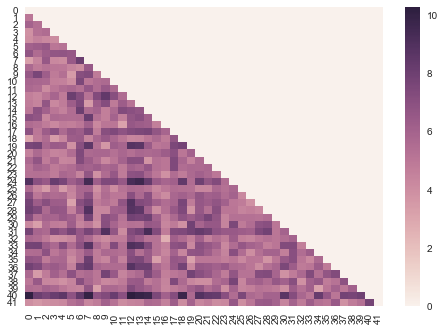

In [6]:
pers_merged_traits = pers_merged.filter(regex='B', axis = 1)
personality_dist = distance.squareform(distance.pdist(pers_merged_traits))
personality_dist_lower = np.tril(personality_dist)
sbs.heatmap(personality_dist_lower)

In [7]:
# flatten matrix
flat_personality_dist = np.ndarray.flatten(personality_dist)

# Convert to data frame and remove 0s 
flat_personality_dist_df = pd.DataFrame(flat_personality_dist)
#flat_personality_dist_df = flat_personality_dist_df[flat_personality_dist > 0]

## Matching pairwise relationships to fMRI data

This step is tricky because we want to make sure that correct pairwise personality dissimilarity measure is match to the corresponding fMRI pair.

In [38]:
#len(brain_df.anon_subj1.repeat(41))

#sub1 = brain_df.anon_subj1 

len(fmri_subjects)


    
    


42

In [25]:
pd.DataFrame(np.append(sub1,sub1))
brain_df

,Left-Accumbens-area,Left-Amygdala,Left-Caudate,Left-Hippocampus,Left-Pallidum,Left-Putamen,Right-Accumbens-area,Right-Amygdala,Right-Caudate,Right-Hippocampus,...,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal,soc_dist,anon_subj1,anon_subj2,anon_dyad
0,0.180049,0.480904,-1.438573,-0.427055,0.162126,-0.400010,0.175406,1.302293,-1.306983,-0.571520,...,-1.027790,0.310944,0.880843,0.017806,2.222975e-01,-0.218926,3,s009,s002,s009_s002
1,1.392424,0.312051,-0.338057,-0.489231,1.566268,0.325261,1.326108,1.766371,-0.059480,-1.050197,...,-0.642304,0.141471,-0.063064,-0.011161,-3.819009e-02,0.525447,2,s026,s002,s026_s002
2,-0.938100,-1.214076,0.247230,-1.108332,0.499046,-0.942296,0.168869,0.581624,0.362893,0.470157,...,0.344931,-1.239993,0.614241,-1.020041,6.537640e-02,-0.568866,2,s026,s009,s026_s009
3,0.337737,-0.067702,0.709368,0.179094,-0.444952,-0.572268,0.041084,0.260014,-0.504239,-0.787081,...,-0.245771,0.204757,-0.825285,-0.084137,6.263659e-01,0.455915,3,s032,s002,s032_s002
4,-0.547740,-0.066560,-0.974878,-0.344717,-1.432473,-0.158029,1.197218,-0.490273,0.271899,-0.835009,...,-0.499028,-1.215422,0.769017,-1.445713,-3.150379e-01,0.053913,3,s032,s009,s032_s009
5,-0.354173,-1.223211,1.179878,1.241780,0.354723,0.888774,-1.013594,-1.148349,0.917323,0.867767,...,0.996816,-0.606706,-0.086734,-0.244693,-1.344995e-01,-0.088461,2,s032,s026,s032_s026
6,-1.432552,-0.457895,-1.933912,-2.656851,-1.564191,-1.367437,-1.572801,-0.612871,-1.359514,-2.700666,...,-0.529640,-0.096226,-1.379129,-0.099918,-1.476976e-01,-0.727434,2,s033,s002,s033_s002
7,1.068600,-0.742438,-0.215458,-1.814251,-2.178355,-1.576167,0.893327,-0.758517,-0.928174,-2.290776,...,0.095832,-1.159186,0.989843,-0.769533,-8.358988e-01,-0.720972,2,s033,s009,s033_s009
8,-1.169796,-0.547350,-0.654049,0.417990,0.374702,-0.325423,-1.308220,-0.690550,0.029262,0.344820,...,-1.343974,-0.866914,-0.072242,-1.215555,-3.161629e-01,0.309764,2,s033,s026,s033_s026
9,0.298241,-0.328273,-0.458597,0.306740,-0.510893,-0.386764,1.637422,0.694894,-0.536673,-1.261133,...,0.693826,-0.594029,-0.867163,0.145562,1.986409e+00,-0.363523,3,s033,s032,s033_s032


## Assumption checks

In [ ]:
# Distribution of the summariezed Bif-5 scores
sbs.distplot(pers_df_filter['Openness'], hist = False)
sbs.distplot(pers_df_filter['Conscientiousness'], hist = False)
sbs.distplot(pers_df_filter['Extraversion'], hist = False)
sbs.distplot(pers_df_filter['Agreeableness'], hist = False)
sbs.distplot(pers_df_filter["Neuroticism"],hist=False)